Trenowanie sieci neuronowej...
Trenowanie zakończone po 584 iteracjach

Konfiguracja sieci: (200, 150, 100, 50)
Funkcja aktywacji: tanh
Liczba iteracji: 584

Błąd MSE (treningowy): 0.000345
Błąd MSE (testowy): 0.000408
R² (treningowy): 0.999354
R² (testowy): 0.999092

Warunek Error < 0.01: SPEŁNIONY ✓


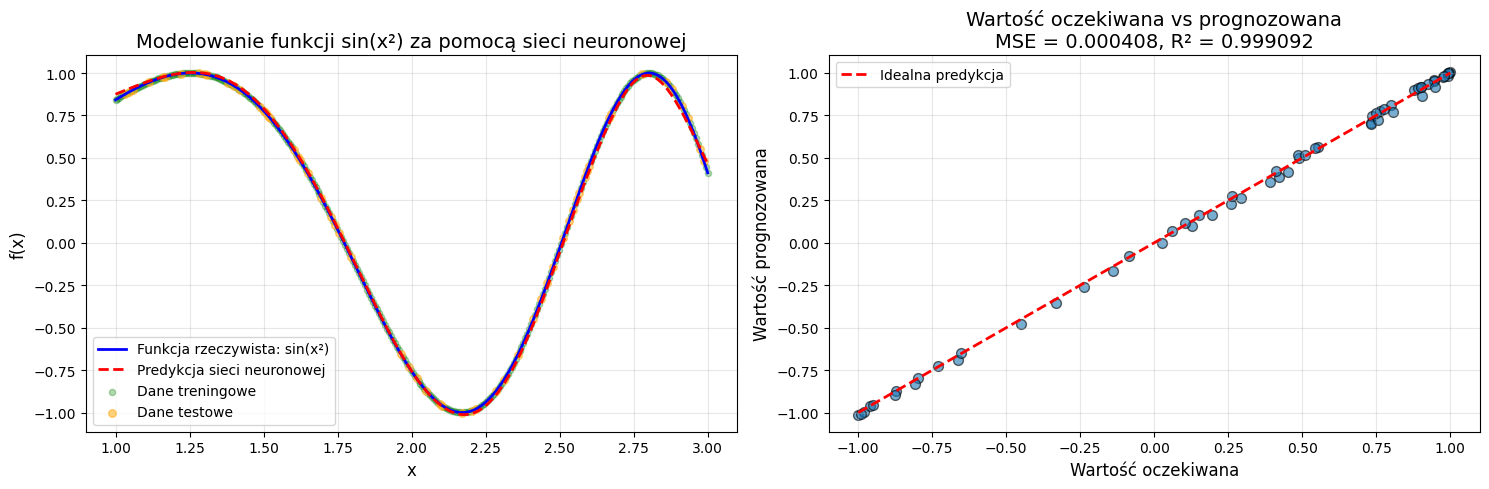


TESTOWANIE RÓŻNYCH KONFIGURACJI SIECI

Testowanie konfiguracji 1/8: (100,)
✗ Warstwy: (100,)                              | MSE: 0.400944 | R²: 0.107508 | Iteracje: 220

Testowanie konfiguracji 2/8: (200,)
✗ Warstwy: (200,)                              | MSE: 0.407387 | R²: 0.093167 | Iteracje: 157

Testowanie konfiguracji 3/8: (100, 100)
✗ Warstwy: (100, 100)                          | MSE: 0.045480 | R²: 0.898764 | Iteracje: 320

Testowanie konfiguracji 4/8: (200, 100)
✗ Warstwy: (200, 100)                          | MSE: 0.379209 | R²: 0.155889 | Iteracje: 39

Testowanie konfiguracji 5/8: (200, 150, 100)
✓ Warstwy: (200, 150, 100)                     | MSE: 0.001098 | R²: 0.997557 | Iteracje: 460

Testowanie konfiguracji 6/8: (200, 150, 100, 50)
✓ Warstwy: (200, 150, 100, 50)                 | MSE: 0.001186 | R²: 0.997359 | Iteracje: 324

Testowanie konfiguracji 7/8: (250, 200, 150, 100)
✗ Warstwy: (250, 200, 150, 100)                | MSE: 0.021719 | R²: 0.951654 | Iteracje: 75

T

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generowanie danych
np.random.seed(42)
x = np.linspace(1, 3, 300).reshape(-1, 1)  # Więcej punktów
y = np.sin(x**2).ravel()

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Tworzenie i trenowanie modelu sieci neuronowej z lepszymi parametrami
model = MLPRegressor(
    hidden_layer_sizes=(200, 150, 100, 50),  # Więcej warstw i neuronów
    activation='tanh',
    solver='adam',
    max_iter=10000,  # Więcej iteracji
    random_state=42,
    learning_rate_init=0.001,
    learning_rate='adaptive',  # Adaptacyjny learning rate
    early_stopping=False,  # Wyłączamy early stopping
    alpha=0.0001,  # Regularyzacja
    tol=1e-6,  # Mniejsza tolerancja
    n_iter_no_change=50
)

# Trenowanie modelu
print("Trenowanie sieci neuronowej...")
model.fit(X_train, y_train)
print(f"Trenowanie zakończone po {model.n_iter_} iteracjach")

# Predykcja
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_all = model.predict(x)

# Obliczanie błędów
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nKonfiguracja sieci: {model.hidden_layer_sizes}")
print(f"Funkcja aktywacji: {model.activation}")
print(f"Liczba iteracji: {model.n_iter_}")
print(f"\nBłąd MSE (treningowy): {mse_train:.6f}")
print(f"Błąd MSE (testowy): {mse_test:.6f}")
print(f"R² (treningowy): {r2_train:.6f}")
print(f"R² (testowy): {r2_test:.6f}")
print(f"\nWarunek Error < 0.01: {'SPEŁNIONY ✓' if mse_test < 0.01 else 'NIE SPEŁNIONY ✗'}")

# Wizualizacja wyników
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Wykres 1: Porównanie funkcji rzeczywistej i przewidywanej
axes[0].plot(x, y, 'b-', label='Funkcja rzeczywista: sin(x²)', linewidth=2)
axes[0].plot(x, y_pred_all, 'r--', label='Predykcja sieci neuronowej', linewidth=2)
axes[0].scatter(X_train, y_train, c='green', alpha=0.3, s=20, label='Dane treningowe')
axes[0].scatter(X_test, y_test, c='orange', alpha=0.5, s=30, label='Dane testowe')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].set_title('Modelowanie funkcji sin(x²) za pomocą sieci neuronowej', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Wykres 2: Wartość oczekiwana vs wartość prognozowana (wykres punktowy)
axes[1].scatter(y_test, y_pred_test, alpha=0.6, s=50, edgecolors='k')
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Idealna predykcja')
axes[1].set_xlabel('Wartość oczekiwana', fontsize=12)
axes[1].set_ylabel('Wartość prognozowana', fontsize=12)
axes[1].set_title(f'Wartość oczekiwana vs prognozowana\nMSE = {mse_test:.6f}, R² = {r2_test:.6f}', 
                  fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Dodatkowa analiza: testowanie różnych konfiguracji
print("\n" + "="*70)
print("TESTOWANIE RÓŻNYCH KONFIGURACJI SIECI")
print("="*70)

configurations = [
    (100,),
    (200,),
    (100, 100),
    (200, 100),
    (200, 150, 100),
    (200, 150, 100, 50),
    (250, 200, 150, 100),
    (300, 200, 150, 100, 50),
]

results = []
for i, config in enumerate(configurations):
    print(f"\nTestowanie konfiguracji {i+1}/{len(configurations)}: {config}")
    model_test = MLPRegressor(
        hidden_layer_sizes=config,
        activation='tanh',
        solver='adam',
        max_iter=10000,
        random_state=42,
        learning_rate_init=0.001,
        learning_rate='adaptive',
        early_stopping=False,
        alpha=0.0001,
        tol=1e-6,
        verbose=False
    )
    model_test.fit(X_train, y_train)
    y_pred = model_test.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((config, mse, r2, model_test.n_iter_))
    status = "✓" if mse < 0.01 else "✗"
    print(f"{status} Warstwy: {str(config):35} | MSE: {mse:.6f} | R²: {r2:.6f} | Iteracje: {model_test.n_iter_}")

# Najlepsza konfiguracja
best_config = min(results, key=lambda x: x[1])
print("\n" + "="*70)
print(f"NAJLEPSZA KONFIGURACJA: {best_config[0]}")
print(f"MSE: {best_config[1]:.6f}, R²: {best_config[2]:.6f}, Iteracje: {best_config[3]}")
print("="*70)

# Jeśli nadal nie spełnia warunku, trenuj jeszcze raz z najlepszą konfiguracją
if best_config[1] >= 0.01:
    print("\n" + "="*70)
    print("DODATKOWE TRENOWANIE Z NAJLEPSZĄ KONFIGURACJĄ")
    print("="*70)
    
    final_model = MLPRegressor(
        hidden_layer_sizes=best_config[0],
        activation='tanh',
        solver='adam',
        max_iter=20000,  # Jeszcze więcej iteracji
        random_state=None,  # Losowa inicjalizacja
        learning_rate_init=0.0005,  # Mniejszy learning rate
        learning_rate='adaptive',
        early_stopping=False,
        alpha=0.00001,
        tol=1e-8
    )
    
    final_model.fit(X_train, y_train)
    y_pred_final = final_model.predict(X_test)
    mse_final = mean_squared_error(y_test, y_pred_final)
    r2_final = r2_score(y_test, y_pred_final)
    
    print(f"✓ WYNIK KOŃCOWY: MSE: {mse_final:.6f} | R²: {r2_final:.6f} | Iteracje: {final_model.n_iter_}")
    print(f"Warunek Error < 0.01: {'SPEŁNIONY ✓' if mse_final < 0.01 else 'NIE SPEŁNIONY ✗'}")
    
    # Finalny wykres
    if mse_final < 0.01:
        y_pred_final_all = final_model.predict(x)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        axes[0].plot(x, y, 'b-', label='Funkcja rzeczywista', linewidth=2)
        axes[0].plot(x, y_pred_final_all, 'r--', label='Predykcja (ulepszona)', linewidth=2)
        axes[0].set_xlabel('x', fontsize=12)
        axes[0].set_ylabel('f(x)', fontsize=12)
        axes[0].set_title('FINALNE MODELOWANIE (MSE < 0.01)', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        axes[1].scatter(y_test, y_pred_final, alpha=0.6, s=50, edgecolors='k', c='green')
        axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
        axes[1].set_xlabel('Wartość oczekiwana', fontsize=12)
        axes[1].set_ylabel('Wartość prognozowana', fontsize=12)
        axes[1].set_title(f'Finalna predykcja\nMSE = {mse_final:.6f}, R² = {r2_final:.6f}', 
                          fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()